In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
)

In [25]:
df = pd.read_csv("laptops-v1.csv")

In [26]:
df.head()

,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro)
0,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,False,True,No OS,1.86,575.00
1,Asus,ZenBook UX430UN,Ultrabook,NaN,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00
2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00
3,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,False,No OS,1.86,393.90
4,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,1.86,344.99


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                791 non-null    object 
 1   Model                791 non-null    object 
 2   Type                 791 non-null    object 
 3   Dimension (in)       717 non-null    float64
 4   Screen Resolution    791 non-null    object 
 5   CPU Brand            791 non-null    object 
 6   CPU Model            791 non-null    object 
 7   CPU Frequency (GHz)  791 non-null    float64
 8   GPU Brand            791 non-null    object 
 9   GPU Model            742 non-null    object 
 10  RAM (GB)             791 non-null    int64  
 11  HDD                  791 non-null    bool   
 12  SSD                  791 non-null    bool   
 13  OS                   791 non-null    object 
 14  Weight (kg)          742 non-null    float64
 15  Price (Euro)         781 non-null    flo

In [28]:
df.drop(columns=["Brand", "Model","GPU Model", "Weight (kg)"], inplace=True)

In [29]:
df.head()

,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,RAM (GB),HDD,SSD,OS,Price (Euro)
0,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,8,False,True,No OS,575.00
1,Ultrabook,NaN,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,16,False,True,Windows,1495.00
2,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,8,False,True,Windows,770.00
3,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,4,True,False,No OS,393.90
4,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,4,True,False,No OS,344.99


In [8]:
df.drop(columns=["GPU Model"], inplace=True)

<Axes: xlabel='Type', ylabel='count'>

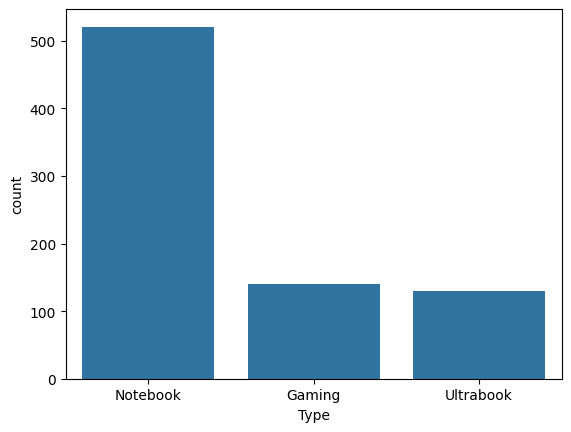

In [30]:
sns.barplot(df["Type"].value_counts())

In [31]:
df.isnull().sum()

Type                    0
Dimension (in)         74
Screen Resolution       0
CPU Brand               0
CPU Model               0
CPU Frequency (GHz)     0
GPU Brand               0
RAM (GB)                0
HDD                     0
SSD                     0
OS                      0
Price (Euro)           10
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 791 non-null    object 
 1   Dimension (in)       717 non-null    float64
 2   Screen Resolution    791 non-null    object 
 3   CPU Brand            791 non-null    object 
 4   CPU Model            791 non-null    object 
 5   CPU Frequency (GHz)  791 non-null    float64
 6   GPU Brand            791 non-null    object 
 7   RAM (GB)             791 non-null    int64  
 8   HDD                  791 non-null    bool   
 9   SSD                  791 non-null    bool   
 10  OS                   791 non-null    object 
 11  Price (Euro)         781 non-null    float64
dtypes: bool(2), float64(3), int64(1), object(6)
memory usage: 63.5+ KB


In [33]:
df= pd.concat([df, pd.get_dummies(df["Type"])], axis=1)
df.drop(columns=["Type"], inplace=True)

In [34]:
df[["Width", "Height"]] = df["Screen Resolution"].str.split("x").tolist()
df["Width"] = df["Width"].astype(int)
df["Height"] = df["Height"].astype(int)
df.drop(columns=["Screen Resolution"], inplace=True)

In [35]:
df.head()

,Dimension (in),CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,RAM (GB),HDD,SSD,OS,Price (Euro),Gaming,Notebook,Ultrabook,Width,Height
0,15.6,Intel,Core i5 7200U,2.5,Intel,8,False,True,No OS,575.00,False,True,False,1920,1080
1,NaN,Intel,Core i7 8550U,1.8,Nvidia,16,False,True,Windows,1495.00,False,False,True,1920,1080
2,14.0,Intel,Core i5 8250U,1.6,Intel,8,False,True,Windows,770.00,False,False,True,1920,1080
3,15.6,Intel,Core i5 7200U,2.5,Intel,4,True,False,No OS,393.90,False,True,False,1366,768
4,15.6,Intel,Core i3 6006U,2.0,Intel,4,True,False,No OS,344.99,False,True,False,1920,1080


In [36]:
df.drop(columns=["CPU Brand"], inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dimension (in)       717 non-null    float64
 1   CPU Frequency (GHz)  791 non-null    float64
 2   RAM (GB)             791 non-null    int64  
 3   HDD                  791 non-null    bool   
 4   SSD                  791 non-null    bool   
 5   Price (Euro)         781 non-null    float64
 6   Gaming               791 non-null    bool   
 7   Notebook             791 non-null    bool   
 8   Ultrabook            791 non-null    bool   
 9   Width                791 non-null    int32  
 10  Height               791 non-null    int32  
 11  CPU Series           791 non-null    int32  
 12  AMD                  791 non-null    bool   
 13  Intel                791 non-null    bool   
 14  Nvidia               791 non-null    bool   
 15  Linux                791 non-null    boo

In [38]:
df["CPU Series"] = df["CPU Model"].str[6:7].astype(int)
df.drop(columns=["CPU Model"], inplace=True)

In [40]:
df = pd.concat([df, pd.get_dummies(df["GPU Brand"])], axis=1)
df.drop(columns=["GPU Brand"], inplace=True)

In [42]:
df["OS"].value_counts()

OS
Windows    689
No OS       53
Linux       49
Name: count, dtype: int64

In [43]:
df = pd.concat([df, pd.get_dummies(df["OS"])], axis=1)
df.drop(columns=["OS"], inplace=True)

In [45]:
df.isnull().sum()

Dimension (in)         74
CPU Frequency (GHz)     0
RAM (GB)                0
HDD                     0
SSD                     0
Price (Euro)           10
Gaming                  0
Notebook                0
Ultrabook               0
Width                   0
Height                  0
CPU Series              0
AMD                     0
Intel                   0
Nvidia                  0
Linux                   0
No OS                   0
Windows                 0
dtype: int64

<Axes: >

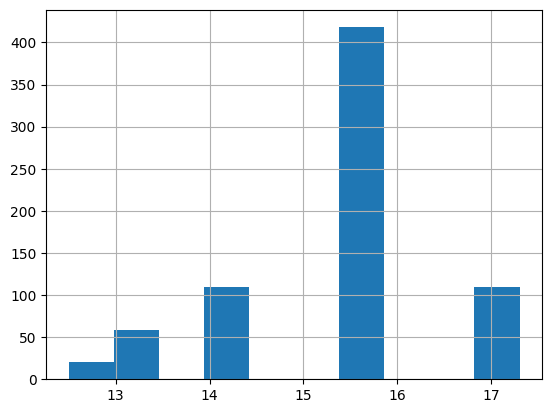

In [46]:
df["Dimension (in)"].hist()

In [47]:
imputer = IterativeImputer()

In [50]:
df["Dimension (in)"] = imputer.fit_transform(df[["Dimension (in)"]])

In [53]:
df.isnull().sum()

Dimension (in)         0
CPU Frequency (GHz)    0
RAM (GB)               0
HDD                    0
SSD                    0
Price (Euro)           0
Gaming                 0
Notebook               0
Ultrabook              0
Width                  0
Height                 0
CPU Series             0
AMD                    0
Intel                  0
Nvidia                 0
Linux                  0
No OS                  0
Windows                0
dtype: int64

In [52]:
df = df.dropna(subset=["Price (Euro)"], axis=0)

In [54]:
X, y = df.drop(columns=["Price (Euro)"]), df["Price (Euro)"]

In [55]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [56]:
regressor = RandomForestRegressor()

In [57]:
df["Price (Euro)"].min()

339.0

In [58]:
df["Price (Euro)"].max()

3975.0

In [59]:
regressor = regressor.fit(train_X, train_y)

In [60]:
pred_y = regressor.predict(test_X)

In [61]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 239.9286019459881
MAPE: 0.20062218172870286
MSE: 127470.46996232295
RMSE: 357.0300687089576
R2 Score: 0.6649924662815847


In [62]:
reg = DecisionTreeRegressor()

In [63]:
reg = reg.fit(train_X, train_y)
pred_y = reg.predict(test_X)

In [64]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 277.17341864964476
MAPE: 0.2372337236205578
MSE: 155065.50767218744
RMSE: 393.7835797391601
R2 Score: 0.5924694299361408


In [65]:
regr = XGBRegressor()

In [66]:
regr = regr.fit(train_X, train_y)

In [67]:
pred_y = regr.predict(test_X)

In [68]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 254.30852193067028
MAPE: 0.21261119212877172
MSE: 135647.57858148174
RMSE: 368.3036499703495
R2 Score: 0.6435020537000536


In [72]:
lgbm = LGBMRegressor()

In [73]:
lgbm = lgbm.fit(train_X, train_y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 624, number of used features: 17
[LightGBM] [Info] Start training from score 1103.700881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [74]:
pred_y = lgbm.predict(test_X)

In [75]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 231.6276178807057
MAPE: 0.1960082155006251
MSE: 110255.11706425867
RMSE: 332.04685974160134
R2 Score: 0.7102364582287184


In [77]:
lin = LinearRegression()

In [78]:
lin = lin.fit(train_X, train_y)

In [79]:
pred_y = lin.predict(test_X)

In [80]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 247.7212380848225
MAPE: 0.23332890317312935
MSE: 113251.32250761768
RMSE: 336.5283383425795
R2 Score: 0.7023620744879973
